In [1]:
import kwhmeter_utils as kf
import logging
import pandas as pd
from datetime import datetime,timedelta
logging.basicConfig(level=logging.DEBUG)

In [32]:
domicilio=kf.suministro('paconavas')

INFO:root:Existen 10 facturas. Desde: 2022-01-21 00:00:00+01:00 hasta:2022-12-22 00:00:00+01:00


In [33]:
periodos_facturacion=domicilio.periodos_facturacion()
periodos_facturacion

,fechaInicio,fechaFin,numero
factura,,,
2022-12-22,2022-11-22 00:00:00+01:00,2022-12-22 00:00:00+01:00,3221222030362782
2022-11-22,2022-10-21 00:00:00+02:00,2022-11-22 00:00:00+01:00,3221122030323849
2022-10-21,2022-09-27 00:00:00+02:00,2022-10-21 00:00:00+02:00,3221021030346154
2022-09-27,2022-07-26 00:00:00+02:00,2022-09-27 00:00:00+02:00,3220927030337878
2022-07-26,2022-06-23 00:00:00+02:00,2022-07-26 00:00:00+02:00,3220726030358467
2022-06-28,2022-05-23 00:00:00+02:00,2022-06-23 00:00:00+02:00,3220628030327990
2022-05-23,2022-04-22 00:00:00+02:00,2022-05-23 00:00:00+02:00,3220523030347163
2022-04-22,2022-03-24 00:00:00+01:00,2022-04-22 00:00:00+02:00,3220422030530482
2022-03-24,2022-02-18 00:00:00+01:00,2022-03-24 00:00:00+01:00,3220324030330656


In [34]:

start = kf.timezone.localize(datetime(2022, 6,1)-timedelta(days=0))
end=start + timedelta(days=60)
print(f'Desde {start} hasta: {end}')
consumos=domicilio.consumo_facturado(['2022-12-22'])
#consumos=domicilio.consumo(start,end)
consumos

Desde 2022-06-01 00:00:00+02:00 hasta: 2022-07-31 00:00:00+02:00


,factura,consumo,tipo,periodo,factura_iberdrola
fecha,,,,,
2022-11-22 01:00:00+01:00,2022-12-22,242.0,R,P3,3221222030362782
2022-11-22 02:00:00+01:00,2022-12-22,150.0,R,P3,3221222030362782
2022-11-22 03:00:00+01:00,2022-12-22,225.0,R,P3,3221222030362782
2022-11-22 04:00:00+01:00,2022-12-22,145.0,R,P3,3221222030362782
2022-11-22 05:00:00+01:00,2022-12-22,242.0,R,P3,3221222030362782
...,...,...,...,...,...
2022-12-21 20:00:00+01:00,2022-12-22,159.0,R,P1,3221222030362782
2022-12-21 21:00:00+01:00,2022-12-22,87.0,R,P1,3221222030362782
2022-12-21 22:00:00+01:00,2022-12-22,288.0,R,P1,3221222030362782


In [35]:
consumos.to_csv('consumos.csv')

In [36]:
cc=domicilio.factura_pvpc(consumos)
cc

INFO:root:recovering missing dates:0


,factura,consumo,tipo,periodo,factura_iberdrola,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
fecha,,,,,,,,,,,,,,,,,,,,,
2022-11-22 01:00:00+01:00,2022-12-22,242.0,R,P3,3221222030362782,74.41,-8.49,3.03,0.018007,-0.002055,...,0.017145,0.001955,0.0191,0.018007,0.037107,0.000186,0.00111,0.038402,0.001920,0.040322
2022-11-22 02:00:00+01:00,2022-12-22,150.0,R,P3,3221222030362782,73.15,-9.29,3.03,0.010972,-0.001393,...,0.017145,0.001955,0.0191,0.010972,0.030072,0.000150,0.00111,0.031332,0.001567,0.032899
2022-11-22 03:00:00+01:00,2022-12-22,225.0,R,P3,3221222030362782,75.22,-7.93,3.03,0.016924,-0.001784,...,0.017145,0.001955,0.0191,0.016924,0.036024,0.000180,0.00111,0.037314,0.001866,0.039180
2022-11-22 04:00:00+01:00,2022-12-22,145.0,R,P3,3221222030362782,76.75,-5.83,3.03,0.011129,-0.000845,...,0.017145,0.001955,0.0191,0.011129,0.030228,0.000151,0.00111,0.031489,0.001574,0.033064
2022-11-22 05:00:00+01:00,2022-12-22,242.0,R,P3,3221222030362782,79.63,-6.50,3.03,0.019270,-0.001573,...,0.017145,0.001955,0.0191,0.019270,0.038370,0.000192,0.00111,0.039672,0.001984,0.041655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21 20:00:00+01:00,2022-12-22,159.0,R,P1,3221222030362782,209.25,6.81,74.41,0.033271,0.001083,...,0.017145,0.001955,0.0191,0.033271,0.052370,0.000262,0.00111,0.053742,0.002687,0.056429
2022-12-21 21:00:00+01:00,2022-12-22,87.0,R,P1,3221222030362782,212.84,6.83,74.41,0.018517,0.000594,...,0.017145,0.001955,0.0191,0.018517,0.037617,0.000188,0.00111,0.038914,0.001946,0.040860
2022-12-21 22:00:00+01:00,2022-12-22,288.0,R,P1,3221222030362782,204.93,6.51,74.41,0.059020,0.001875,...,0.017145,0.001955,0.0191,0.059020,0.078120,0.000391,0.00111,0.079620,0.003981,0.083601


<AxesSubplot:xlabel='fecha', ylabel='consumo'>

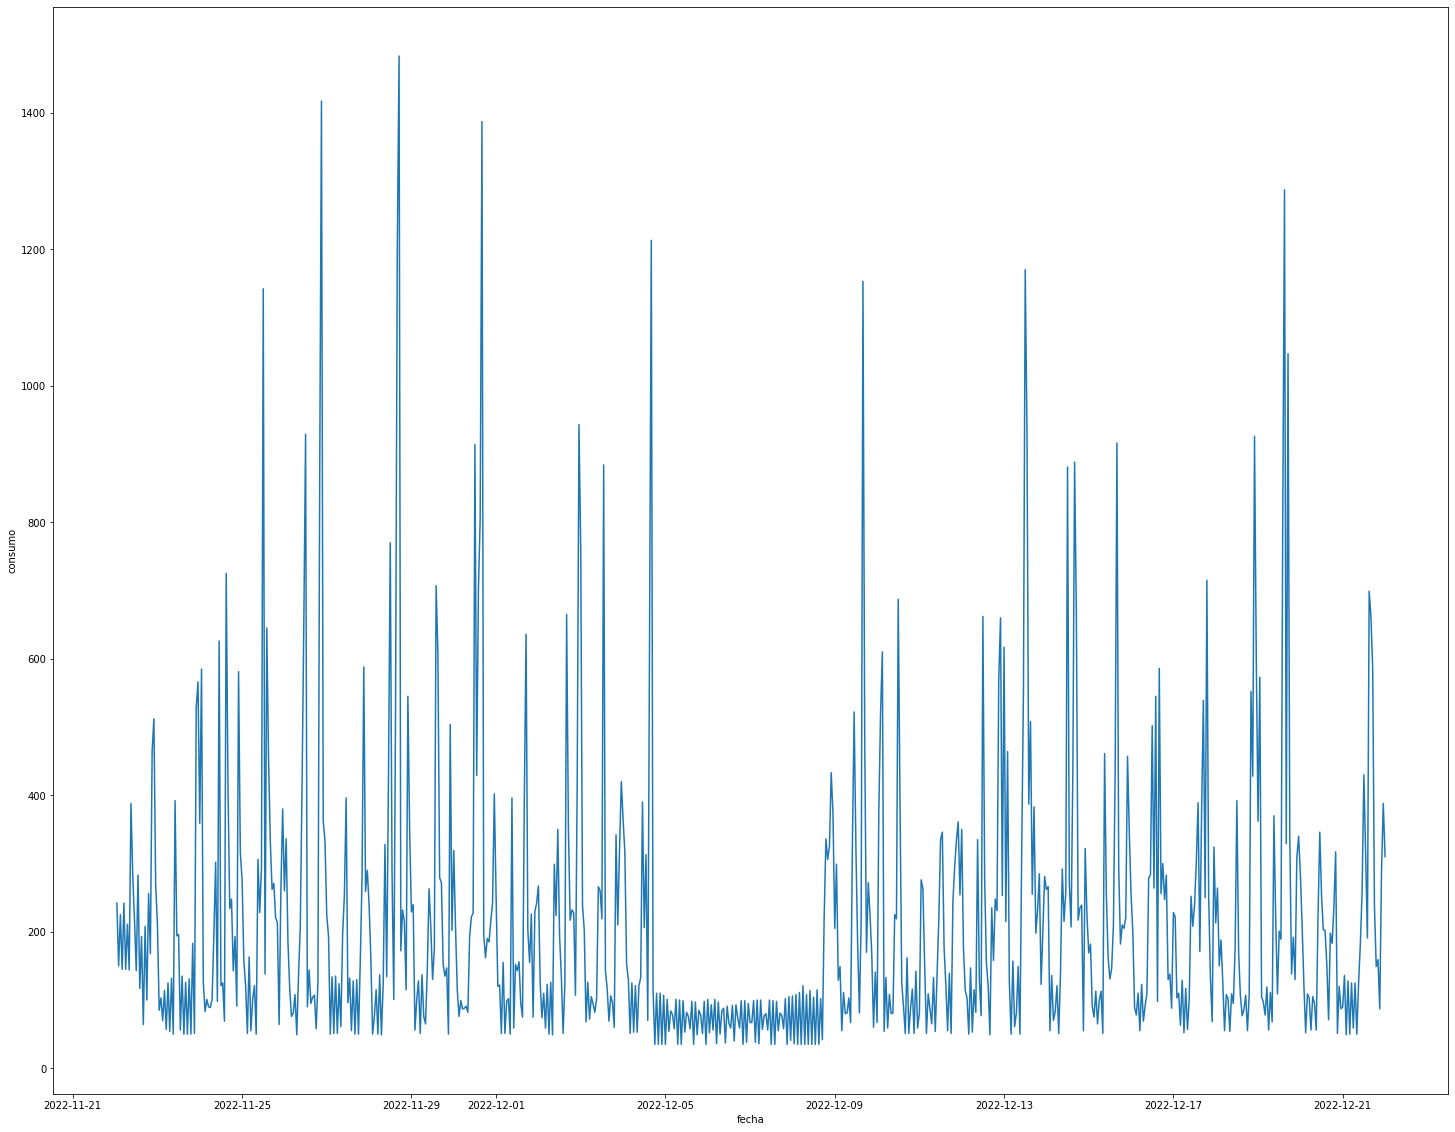

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 20]
sns.lineplot(data=cc.reset_index(),x='fecha',y='consumo')

In [38]:
cc


,factura,consumo,tipo,periodo,factura_iberdrola,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
fecha,,,,,,,,,,,,,,,,,,,,,
2022-11-22 01:00:00+01:00,2022-12-22,242.0,R,P3,3221222030362782,74.41,-8.49,3.03,0.018007,-0.002055,...,0.017145,0.001955,0.0191,0.018007,0.037107,0.000186,0.00111,0.038402,0.001920,0.040322
2022-11-22 02:00:00+01:00,2022-12-22,150.0,R,P3,3221222030362782,73.15,-9.29,3.03,0.010972,-0.001393,...,0.017145,0.001955,0.0191,0.010972,0.030072,0.000150,0.00111,0.031332,0.001567,0.032899
2022-11-22 03:00:00+01:00,2022-12-22,225.0,R,P3,3221222030362782,75.22,-7.93,3.03,0.016924,-0.001784,...,0.017145,0.001955,0.0191,0.016924,0.036024,0.000180,0.00111,0.037314,0.001866,0.039180
2022-11-22 04:00:00+01:00,2022-12-22,145.0,R,P3,3221222030362782,76.75,-5.83,3.03,0.011129,-0.000845,...,0.017145,0.001955,0.0191,0.011129,0.030228,0.000151,0.00111,0.031489,0.001574,0.033064
2022-11-22 05:00:00+01:00,2022-12-22,242.0,R,P3,3221222030362782,79.63,-6.50,3.03,0.019270,-0.001573,...,0.017145,0.001955,0.0191,0.019270,0.038370,0.000192,0.00111,0.039672,0.001984,0.041655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21 20:00:00+01:00,2022-12-22,159.0,R,P1,3221222030362782,209.25,6.81,74.41,0.033271,0.001083,...,0.017145,0.001955,0.0191,0.033271,0.052370,0.000262,0.00111,0.053742,0.002687,0.056429
2022-12-21 21:00:00+01:00,2022-12-22,87.0,R,P1,3221222030362782,212.84,6.83,74.41,0.018517,0.000594,...,0.017145,0.001955,0.0191,0.018517,0.037617,0.000188,0.00111,0.038914,0.001946,0.040860
2022-12-21 22:00:00+01:00,2022-12-22,288.0,R,P1,3221222030362782,204.93,6.51,74.41,0.059020,0.001875,...,0.017145,0.001955,0.0191,0.059020,0.078120,0.000391,0.00111,0.079620,0.003981,0.083601


In [39]:
cc.shape[0]/24

30.0

In [40]:
cc.groupby('periodo').sum()

<ipython-input-40-eedf7e5c06ee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc.groupby('periodo').sum()


,consumo,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,TEUPCB,PEAJES_E_PRICE,CARGOS_E_PRICE,PEAJES_E,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
periodo,,,,,,,,,,,,,,,,,,,,,
P1,41307.0,46330.28,6131.28,11905.6,11.413690,1.345971,3.073654,4.44592,7.45952,1.147798,...,2.743217,0.312730,3.055947,11.413690,14.469637,0.072348,0.177533,14.719519,0.735976,15.455495
P2,49253.0,37124.91,6361.40,4555.2,10.900616,1.807214,1.402233,3.06336,1.49184,0.942998,...,2.743217,0.312730,3.055947,10.900616,13.956562,0.069783,0.177533,14.203878,0.710194,14.914072
P3,63990.0,90447.30,25504.09,1212.0,14.209489,3.549735,0.193890,0.28120,0.93240,0.044985,...,6.858042,0.781825,7.639867,14.209489,21.849356,0.109247,0.443833,22.402436,1.120122,23.522558


In [41]:
result=domicilio.formater(cc)

/home/nacho/work/PYTHON/venv/lib/python3.8/site-packages/kwhmeter_utils/factura_pvpc.py:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cc_por_periodo=datos.groupby('periodo').sum()


In [42]:
import jinja2
template_loader = jinja2.FileSystemLoader('../kwhmeter_utils/templates')
template_env = jinja2.Environment(loader=template_loader)

template = template_env.get_template('factura_pvpc.html')
output_text = template.render(result)

from IPython.core.display import display, HTML
display(HTML(output_text))
with open('pvpc.html',"w") as f:
    f.write(output_text)

In [43]:
import pdfkit
#Define path to wkhtmltopdf.exe
path_to_wkhtmltopdf = r'/usr/bin/wkhtmltopdf'
#Define path to HTML file
path_to_file = 'sample.html'
#Point pdfkit configuration to wkhtmltopdf.exe
config = pdfkit.configuration(wkhtmltopdf=path_to_wkhtmltopdf)
#Convert HTML file to PDF
options = {
    'zoom':2,
}
pdfkit.from_string(output_text, output_path='sample.pdf',options=options)

True

/home/nacho/work/PYTHON/venv/lib/python3.8/site-packages/calplot/calplot.py:193: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax.set_xticks([by_day.loc[pd.Timestamp(


<AxesSubplot:>

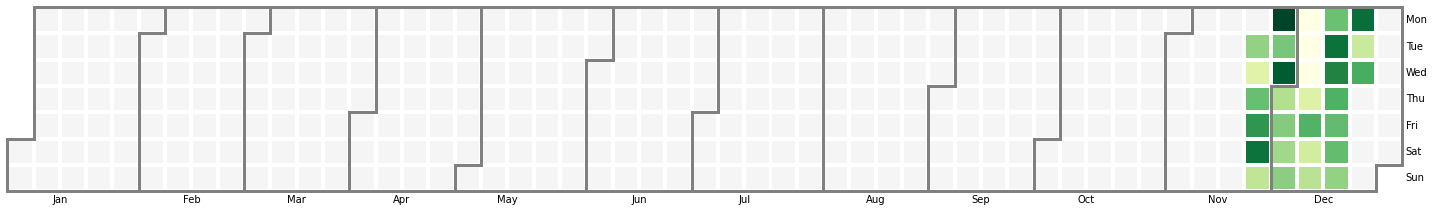

In [44]:
import calplot
cc0=cc[(cc.index.hour>=9) & (cc.index.hour<=22)]
calplot.yearplot(cc0['consumo'],linewidth=3, cmap='YlGn')

In [45]:
cc0

,factura,consumo,tipo,periodo,factura_iberdrola,PCB_PRICE,EDCGASPCB_PRICE,TEUPCB_PRICE,PCB,EDCGASPCB,...,PEAJES_Y_CARGOS_P,COMERCIALIZADORA_P,TERMINO_FIJO,TERMINO_VARIABLE,TOTAL_ELECTRICIDAD,IMPUESTO_ELECTRICO,ALQUILER_CONTADOR,IMPORTE_TOTAL,IVA,TOTAL_CON_IVA
fecha,,,,,,,,,,,,,,,,,,,,,
2022-11-22 09:00:00+01:00,2022-12-22,388.0,R,P2,3221222030362782,155.37,-8.33,28.47,0.060284,-0.003232,...,0.017145,0.001955,0.0191,0.060284,0.079383,0.000397,0.00111,0.080890,0.004044,0.084934
2022-11-22 10:00:00+01:00,2022-12-22,283.0,R,P2,3221222030362782,154.19,-7.10,28.47,0.043636,-0.002009,...,0.017145,0.001955,0.0191,0.043636,0.062735,0.000314,0.00111,0.064159,0.003208,0.067367
2022-11-22 11:00:00+01:00,2022-12-22,218.0,R,P1,3221222030362782,183.45,-7.93,74.41,0.039992,-0.001729,...,0.017145,0.001955,0.0191,0.039992,0.059092,0.000295,0.00111,0.060497,0.003025,0.063522
2022-11-22 12:00:00+01:00,2022-12-22,143.0,R,P1,3221222030362782,161.55,-8.96,74.41,0.023102,-0.001281,...,0.017145,0.001955,0.0191,0.023102,0.042201,0.000211,0.00111,0.043522,0.002176,0.045698
2022-11-22 13:00:00+01:00,2022-12-22,283.0,R,P1,3221222030362782,156.41,-9.09,74.41,0.044264,-0.002572,...,0.017145,0.001955,0.0191,0.044264,0.063364,0.000317,0.00111,0.064790,0.003240,0.068030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21 18:00:00+01:00,2022-12-22,237.0,R,P2,3221222030362782,148.49,5.30,28.47,0.035192,0.001256,...,0.017145,0.001955,0.0191,0.035192,0.054292,0.000271,0.00111,0.055673,0.002784,0.058456
2022-12-21 19:00:00+01:00,2022-12-22,149.0,R,P1,3221222030362782,203.42,6.75,74.41,0.030310,0.001006,...,0.017145,0.001955,0.0191,0.030310,0.049409,0.000247,0.00111,0.050766,0.002538,0.053304
2022-12-21 20:00:00+01:00,2022-12-22,159.0,R,P1,3221222030362782,209.25,6.81,74.41,0.033271,0.001083,...,0.017145,0.001955,0.0191,0.033271,0.052370,0.000262,0.00111,0.053742,0.002687,0.056429


/home/nacho/work/PYTHON/venv/lib/python3.8/site-packages/calplot/calplot.py:193: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  ax.set_xticks([by_day.loc[pd.Timestamp(


<AxesSubplot:>

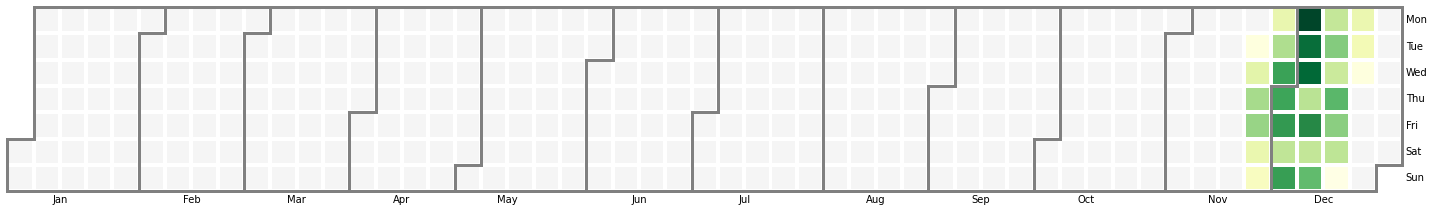

In [46]:
import calplot
calplot.yearplot(cc0['PCB_PRICE'],linewidth=3, cmap='YlGn')